In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
import datetime as dt
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataset import create_dataset
from tests import perform_signs_test, perform_arrange_test

%matplotlib inline

In [3]:
from collections import namedtuple

# DTO for parameters passed to each tests run
Parameters = namedtuple("Parameters", field_names=["mean", "std", "n_samples", "sample_size", "alpha_level"])

# DTO for output of each tests run
Result = namedtuple("Result", field_names=[
    "avg_signs_pvalue", "avg_signs_power", "avg_arrange_pvalue", "avg_arrange_power"
])

## Генерация параметров
Создадим списки значений мат ожидания и среднеквадратического отлонения и сгенерируем все пары

In [4]:
from itertools import product

# Mean values 0.0, 0.1, ..., 2.0
mean_list = [i / 10 for i in range(0, 21)]

# Stddev values 0.1, 0.2 ..., 2.0
std_list = [i / 10 for i in range(1, 21)]

# Additional `hidden` parameters
n_samples_list = [10000]
sample_size_list = [20]
alpha_level_list = [0.05]

combinations = product(mean_list, std_list, n_samples_list, sample_size_list, alpha_level_list)
parameters_list = [
    Parameters(mean=c[0], std=c[1], n_samples=c[2], sample_size=c[3], alpha_level=c[4]) 
    for c in combinations
]

## Расчёт критериев
Для реализации вычисления тестов были созданы функции в модуле _tests_.
Вычисления векторизованы, то есть при одном запуске функции считаются тесты сразу по всем выборкам.

In [5]:
def run_tests(p: Parameters, median_h0: float = .0) -> Result:    
    # Unwrapping parameters
    mean = p.mean
    std = p.std
    n_samples = p.n_samples
    sample_size = p.sample_size
    alpha_level = p.alpha_level
        
    # Generate data from normal distribution
    data = create_dataset(n_samples=n_samples, sample_size=sample_size, mean=mean, sigma=std)

    # Compute signs test
    signs_results, signs_pvalue, signs_power = perform_signs_test(
        data=data, 
        median_h0=median_h0, 
        alpha_level=alpha_level
    )
    
    # Compute arrange test
    arrange_results, arrange_pvalue, arrange_power = perform_arrange_test(
        data=data, 
        alpha_level=alpha_level
    )

    # Return average pvalue and power over all samples
    result = Result(
        avg_signs_pvalue = np.average(signs_pvalue),
        avg_signs_power = np.average(signs_power),
        avg_arrange_pvalue = np.average(arrange_pvalue),
        avg_arrange_power = np.average(arrange_power)
    )
    
    return result

## Запуск

In [6]:
results = {}

time_start = time.clock()

for parameters in parameters_list:
    print("Executing with parameters: {}".format(parameters))
    result = run_tests(parameters)
    results[parameters] = result
    
time_end = time.clock()

Executing with parameters: Parameters(mean=0.0, std=0.1, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.0, std=0.2, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.0, std=0.3, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.0, std=0.4, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.0, std=0.5, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.0, std=0.6, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.0, std=0.7, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.0, std=0.8, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.0, std=0.9, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: P

Executing with parameters: Parameters(mean=0.3, std=1.8, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.3, std=1.9, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.3, std=2.0, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.4, std=0.1, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.4, std=0.2, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.4, std=0.3, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.4, std=0.4, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.4, std=0.5, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.4, std=0.6, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: P

Executing with parameters: Parameters(mean=0.7, std=1.4, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.7, std=1.5, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.7, std=1.6, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.7, std=1.7, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.7, std=1.8, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.7, std=1.9, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.7, std=2.0, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.8, std=0.1, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=0.8, std=0.2, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: P

Executing with parameters: Parameters(mean=1.1, std=1.0, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.1, std=1.1, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.1, std=1.2, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.1, std=1.3, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.1, std=1.4, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.1, std=1.5, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.1, std=1.6, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.1, std=1.7, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.1, std=1.8, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: P

Executing with parameters: Parameters(mean=1.5, std=0.6, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.5, std=0.7, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.5, std=0.8, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.5, std=0.9, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.5, std=1.0, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.5, std=1.1, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.5, std=1.2, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.5, std=1.3, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.5, std=1.4, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: P

Executing with parameters: Parameters(mean=1.9, std=0.3, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.9, std=0.4, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.9, std=0.5, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.9, std=0.6, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.9, std=0.7, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.9, std=0.8, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.9, std=0.9, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.9, std=1.0, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: Parameters(mean=1.9, std=1.1, n_samples=10000, sample_size=20, alpha_level=0.05)
Executing with parameters: P

In [7]:
print("Execution time is: %i s" % (time_end - time_start))

Execution time is: 69 s


## Отображение результатов
Результаты будут обёрнуты в Pandas DataFrame и отрисованы в виде тепловой карты

In [8]:
import pandas as pd

signs_pvalue_data = []
signs_power_data = []

arrange_pvalue_data = []
arrange_power_data = []

for p, result in results.items():
    mean = p.mean
    sigma = p.std
    
    signs_pvalue = result.avg_signs_pvalue
    signs_power = result.avg_signs_power
    signs_pvalue_data.append((mean, sigma, signs_pvalue))
    signs_power_data.append((mean, sigma, signs_power))
    
    arrange_pvalue = result.avg_arrange_pvalue
    arrange_power = result.avg_arrange_power
    arrange_pvalue_data.append((mean, sigma, arrange_pvalue))
    arrange_power_data.append((mean, sigma, arrange_power))
    
signs_pvalue_df = pd.DataFrame(signs_pvalue_data, columns=["Mean", "Sigma", "P-Value"])
signs_pvalue_df = signs_pvalue_df.pivot("Sigma", "Mean", "P-Value").iloc[::-1]

signs_power_df = pd.DataFrame(signs_power_data, columns=["Mean", "Sigma", "Power"])
signs_power_df = signs_power_df.pivot("Sigma", "Mean", "Power").iloc[::-1]

arrange_pvalue_df = pd.DataFrame(arrange_pvalue_data, columns=["Mean", "Sigma", "P-Value"])
arrange_pvalue_df = arrange_pvalue_df.pivot("Sigma", "Mean", "P-Value").iloc[::-1]

arrange_power_df = pd.DataFrame(arrange_power_data, columns=["Mean", "Sigma", "Power"])
arrange_power_df = arrange_power_df.pivot("Sigma", "Mean", "Power").iloc[::-1]

#### Пример данных

In [9]:
signs_pvalue_df

Mean,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0
Sigma,,,,,,,,,,,,,,,,,,,,,
2.0,0.125413,0.124443,0.121150,0.116378,1.109905e-01,1.038643e-01,9.549941e-02,8.661395e-02,7.739680e-02,6.694235e-02,...,5.044050e-02,4.309752e-02,3.525268e-02,2.920213e-02,2.375063e-02,1.921337e-02,1.571493e-02,1.268911e-02,9.541467e-03,7.564060e-03
1.9,0.124742,0.124102,0.120704,0.115523,1.093061e-01,1.017831e-01,9.237032e-02,8.324281e-02,7.250713e-02,6.248470e-02,...,4.570818e-02,3.787425e-02,3.121117e-02,2.573664e-02,2.013115e-02,1.594789e-02,1.253956e-02,9.784552e-03,7.546881e-03,5.743686e-03
1.8,0.125816,0.123671,0.120274,0.114965,1.071683e-01,9.883126e-02,8.984974e-02,7.988770e-02,6.900599e-02,5.931625e-02,...,4.245017e-02,3.354857e-02,2.769182e-02,2.073040e-02,1.631702e-02,1.342086e-02,1.017693e-02,7.394234e-03,5.629122e-03,4.264925e-03
1.7,0.124859,0.123380,0.120089,0.114505,1.057678e-01,9.711426e-02,8.547699e-02,7.480769e-02,6.319317e-02,5.412177e-02,...,3.532792e-02,2.872779e-02,2.260531e-02,1.768060e-02,1.361794e-02,1.049539e-02,7.219005e-03,5.574136e-03,4.010900e-03,2.981747e-03
1.6,0.124693,0.123245,0.118733,0.112037,1.036799e-01,9.366218e-02,8.105761e-02,7.071626e-02,5.824430e-02,4.840378e-02,...,3.070351e-02,2.352574e-02,1.889970e-02,1.339047e-02,9.923186e-03,7.605606e-03,5.449415e-03,4.067535e-03,2.797529e-03,2.035812e-03
1.5,0.125300,0.123362,0.118662,0.110920,1.000398e-01,9.051403e-02,7.836173e-02,6.391223e-02,5.324120e-02,4.296251e-02,...,2.565096e-02,1.955616e-02,1.431642e-02,1.054414e-02,7.460181e-03,5.380271e-03,3.731258e-03,2.742169e-03,1.846499e-03,1.309965e-03
1.4,0.125129,0.124410,0.117231,0.109201,9.675048e-02,8.323061e-02,7.159917e-02,5.929914e-02,4.741033e-02,3.626065e-02,...,2.085355e-02,1.493443e-02,1.107031e-02,7.495685e-03,5.167165e-03,3.517723e-03,2.502202e-03,1.682813e-03,1.002147e-03,7.059927e-04
1.3,0.126061,0.123288,0.116309,0.106561,9.305003e-02,8.007921e-02,6.605351e-02,5.264804e-02,4.035828e-02,3.059284e-02,...,1.570595e-02,1.109656e-02,7.747711e-03,5.118365e-03,3.364633e-03,2.193893e-03,1.409820e-03,9.253935e-04,6.473635e-04,3.847326e-04
1.2,0.125559,0.122933,0.115033,0.104012,9.026726e-02,7.311304e-02,5.841596e-02,4.485382e-02,3.325748e-02,2.458764e-02,...,1.141548e-02,7.645209e-03,4.906144e-03,3.356601e-03,2.033676e-03,1.238814e-03,8.208787e-04,4.616339e-04,3.060395e-04,1.910924e-04


### P-значение теста знаков

Text(159.0, 0.5, 'Sigma')

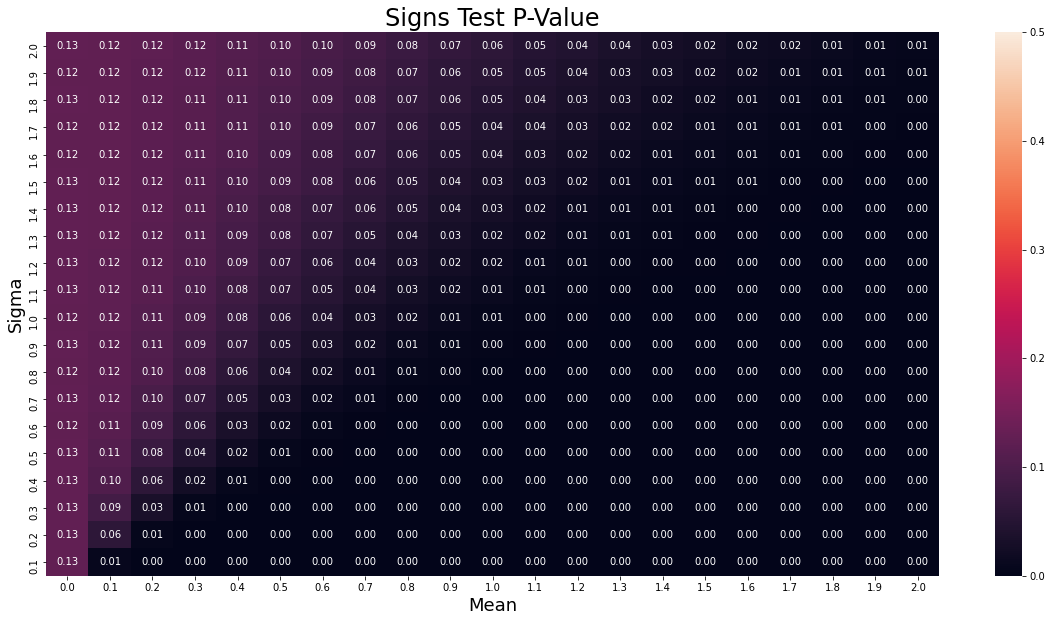

In [10]:
plt.figure(figsize = (20, 10))

# vmax is set to 0.5 for better plot
ax = sns.heatmap(signs_pvalue_df, vmin=.0, vmax=0.5, annot=True, fmt='4.2f')

ax.set_title("Signs Test P-Value", fontsize=24)
ax.set_xlabel("Mean", fontsize=18)
ax.set_ylabel("Sigma", fontsize=18)

### Мощность теста знаков

Text(159.0, 0.5, 'Sigma')

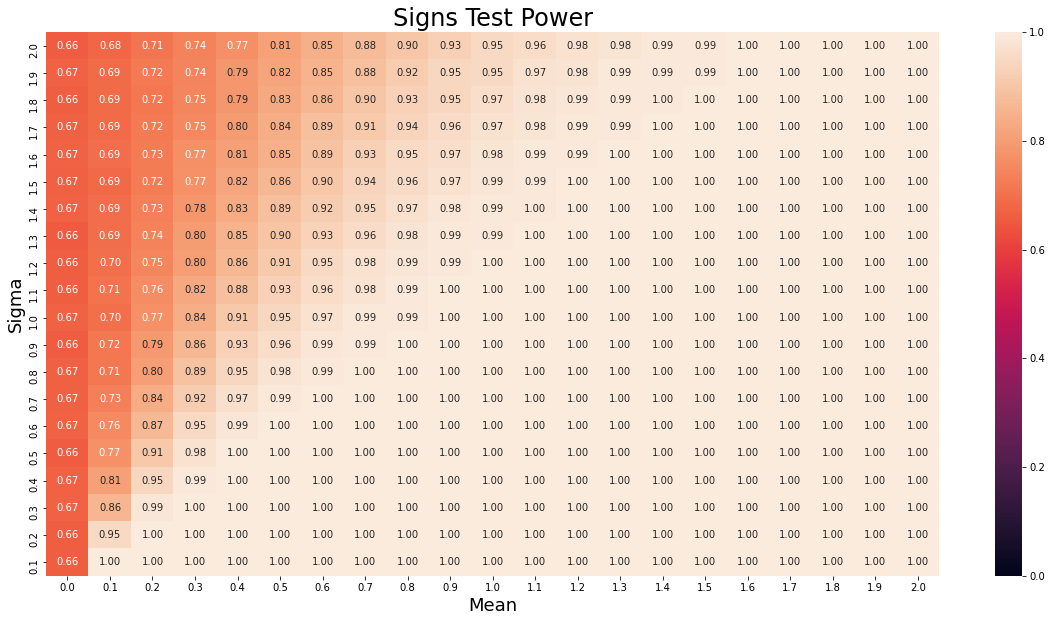

In [11]:
plt.figure(figsize = (20, 10))

ax = sns.heatmap(signs_power_df, vmin=.0, vmax=1, annot=True, fmt='4.2f')

ax.set_title("Signs Test Power", fontsize=24)
ax.set_xlabel("Mean", fontsize=18)
ax.set_ylabel("Sigma", fontsize=18)

### P-значение одновыборочного перестановочного теста

Text(159.0, 0.5, 'Sigma')

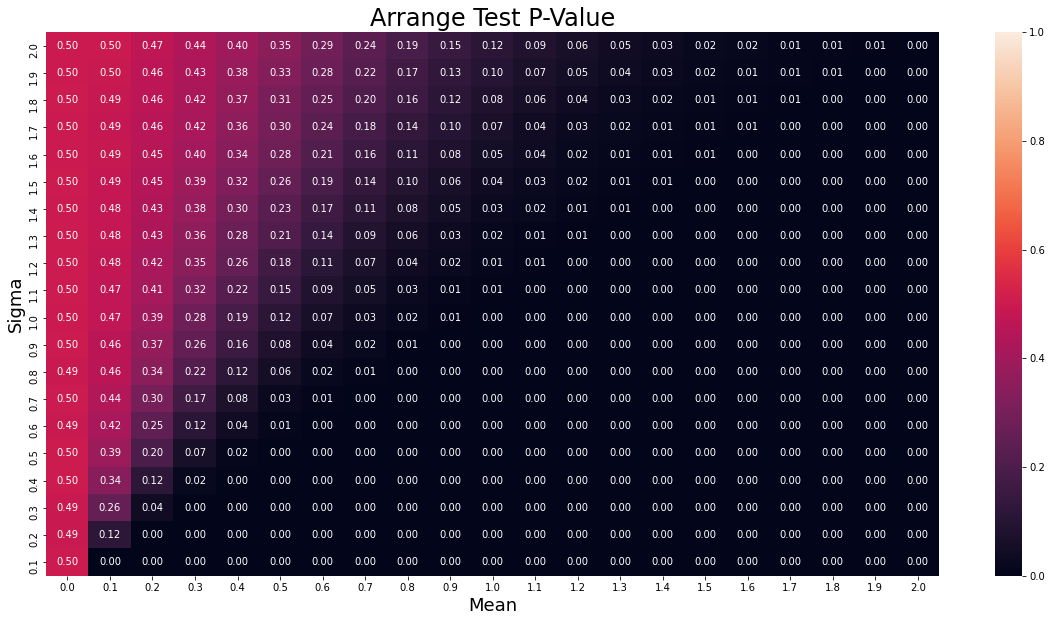

In [12]:
plt.figure(figsize = (20, 10))

ax = sns.heatmap(arrange_pvalue_df, vmin=.0, vmax=1, annot=True, fmt='4.2f')

ax.set_title("Arrange Test P-Value", fontsize=24)
ax.set_xlabel("Mean", fontsize=18)
ax.set_ylabel("Sigma", fontsize=18)

### Мощность одновыборочного перестановочного теста

Text(159.0, 0.5, 'Sigma')

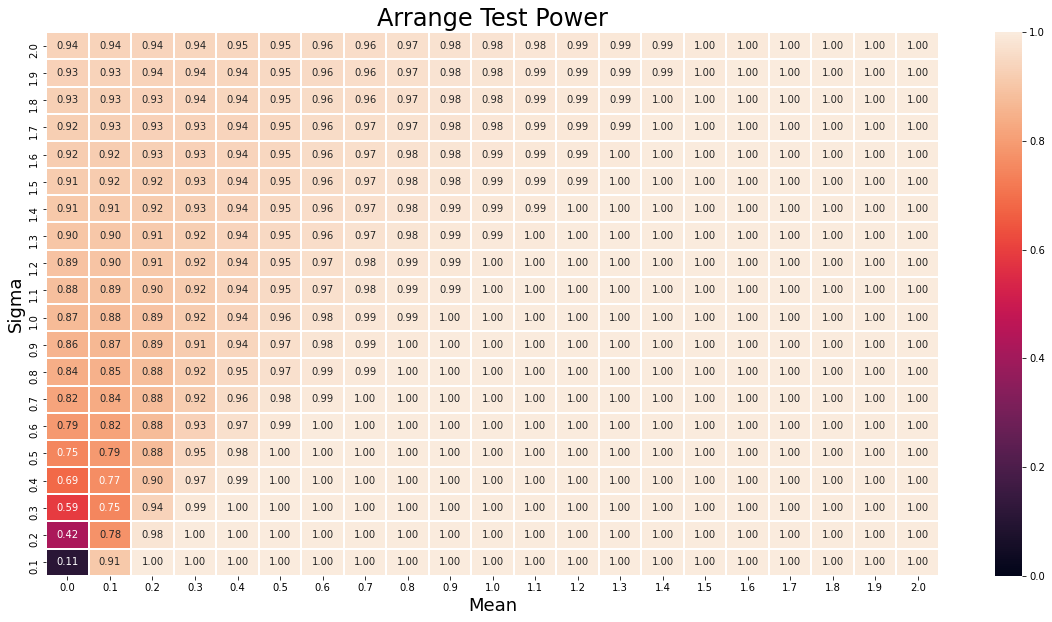

In [14]:
plt.figure(figsize = (20, 10))

ax = sns.heatmap(arrange_power_df, vmin=.0, vmax=1, annot=True, fmt='4.2f', linewidth=1)

ax.set_title("Arrange Test Power", fontsize=24)
ax.set_xlabel("Mean", fontsize=18)
ax.set_ylabel("Sigma", fontsize=18)